In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/traffic_to_viz.csv', encoding='unicode_escape').drop(columns=["Unnamed: 0"])

In [4]:
def correct_encoding(df):
    # Function to correct string encoding
    def correct_chain(chaine):
        if isinstance(chaine, str):
            try:
                return chaine.encode('latin1').decode('utf-8')
            except UnicodeEncodeError:
                return chaine
        return chaine

    # Correct values in the DataFrame
    for col in df.columns:
        df[col] = df[col].apply(correct_chain)

    # Correct column names
    df.columns = [correct_chain(col) for col in df.columns]

    return df

In [5]:
# Apply the function to your DataFrame
df = correct_encoding(df)

In [6]:
df.columns

Index(['Year', 'Area', 'Date', 'Road', 'Municipality Name', 'County Name',
       'Province Name', 'Fatalties', 'Serious Injuries', 'Light Injuries',
       'Total Victims', 'Units Involved', 'Pedestrains Involved',
       'Bicycles Involved', 'Mopeds Involved', 'Motorcycles',
       'Light Vehicles Involved', 'Heavy Vehicles Involved',
       'Other Units Involved', 'Unspecified Units Involved',
       'Road Speed Limit', 'Accident with Hit and Run', 'Fog Presence',
       'Surrounding Environment', 'Special Lane Presence',
       'Special Traffic Measures', 'Weather Conditions',
       'Special Road Functions', 'Severity of Accident', 'Influence of Fog',
       'Influence of Environment', 'Influence of Traffic',
       'Influence of Weather', 'Influence of Wind Intensity',
       'Influence of Lighting', 'Influence of Special Measures',
       'Influence of Road Objects', 'Influence of Road Surface',
       'Influence of Visibility', 'Intersection Characteristics',
       'Lighting C

In [7]:
df_fatalties = df[["Year","Fatalties", "Serious Injuries", "Light Injuries"]]

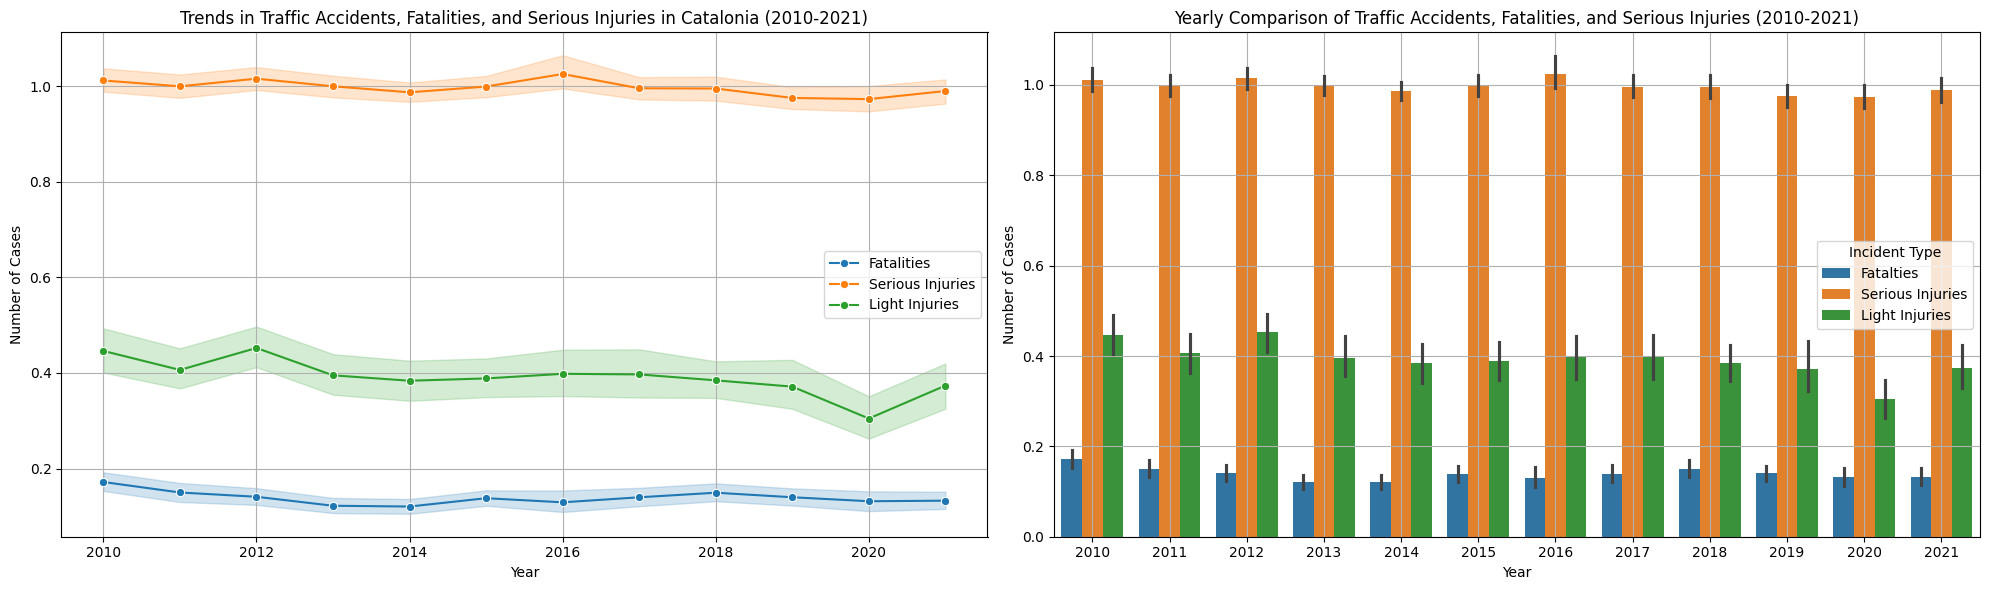

In [8]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
# Plotting Fatalties
sns.lineplot(x='Year', y='Fatalties', data=df, marker='o', label='Fatalities')
# Plotting Serious Injuries
sns.lineplot(x='Year', y='Serious Injuries', data=df, marker='o', label='Serious Injuries')
# Plotting Light Injuries
sns.lineplot(x='Year', y='Light Injuries', data=df, marker='o', label='Light Injuries')
plt.title('Trends in Traffic Accidents, Fatalities, and Serious Injuries in Catalonia (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
df_melted = df_fatalties.melt(id_vars='Year', var_name='Type', value_name='Cases')
sns.barplot(data=df_melted, x='Year', y='Cases', hue='Type')
plt.title('Yearly Comparison of Traffic Accidents, Fatalities, and Serious Injuries (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Incident Type')
plt.grid(True)

plt.tight_layout()
plt.show()

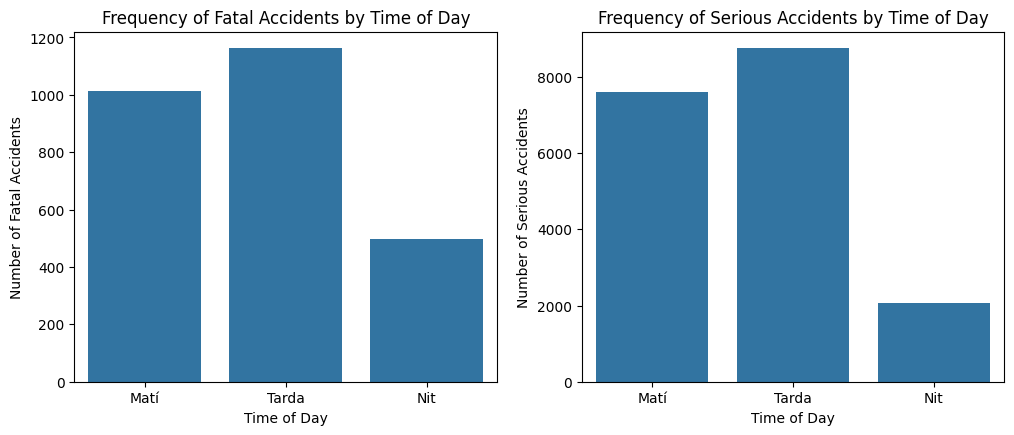

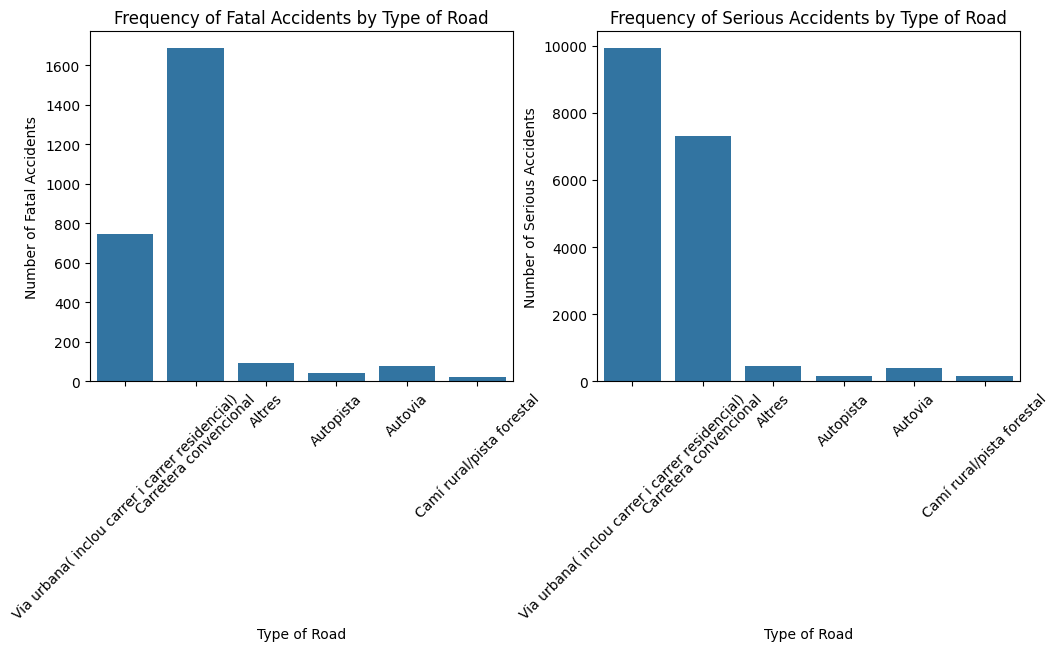

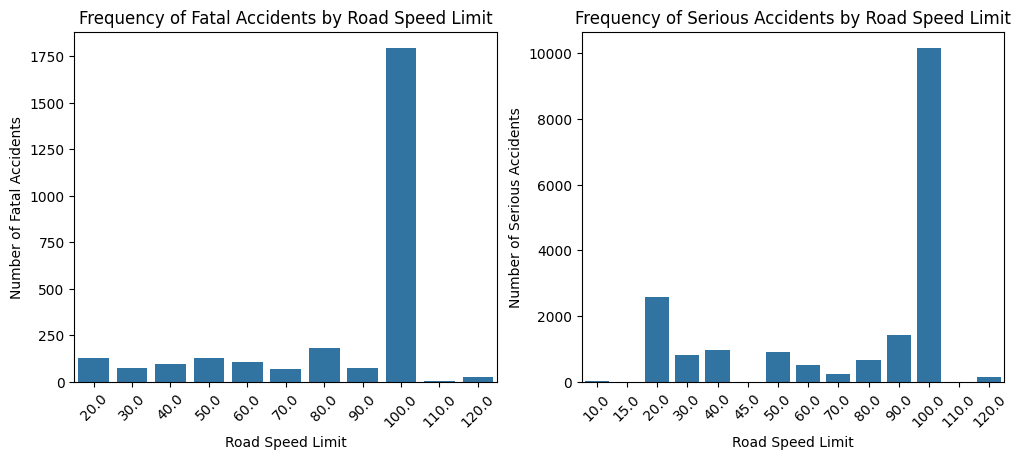

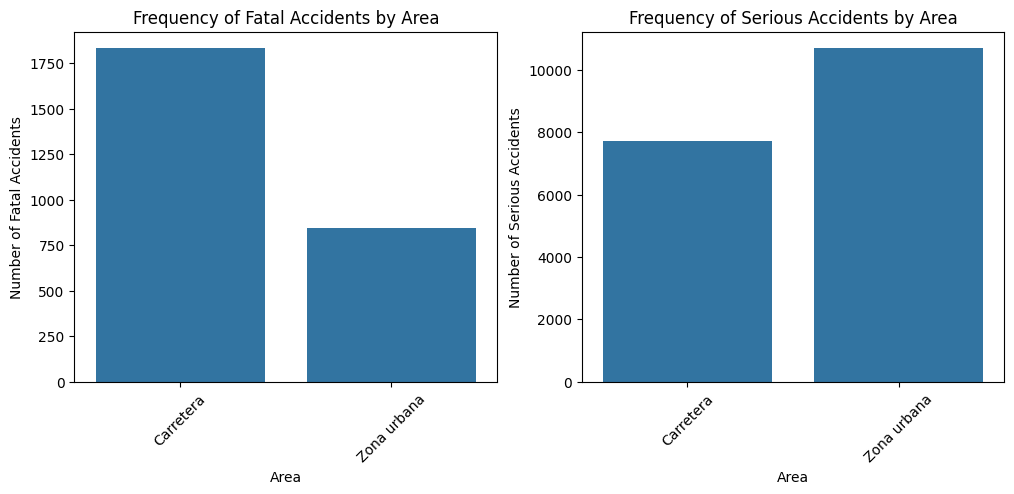

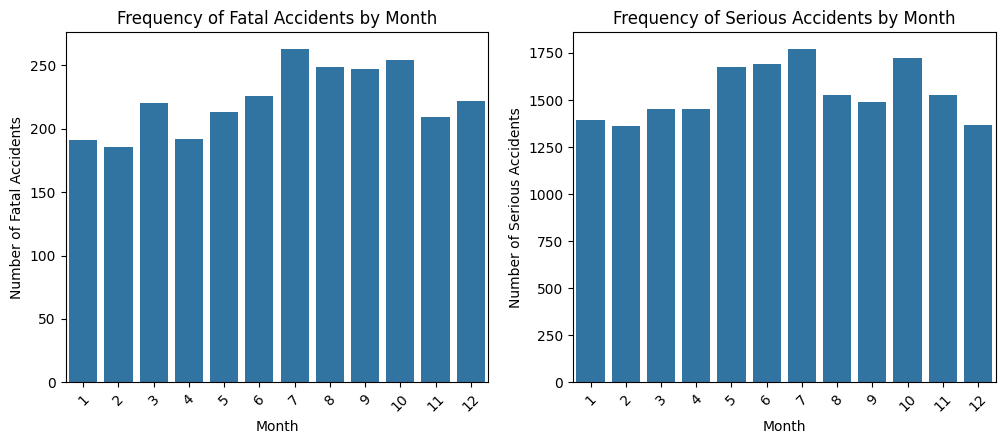

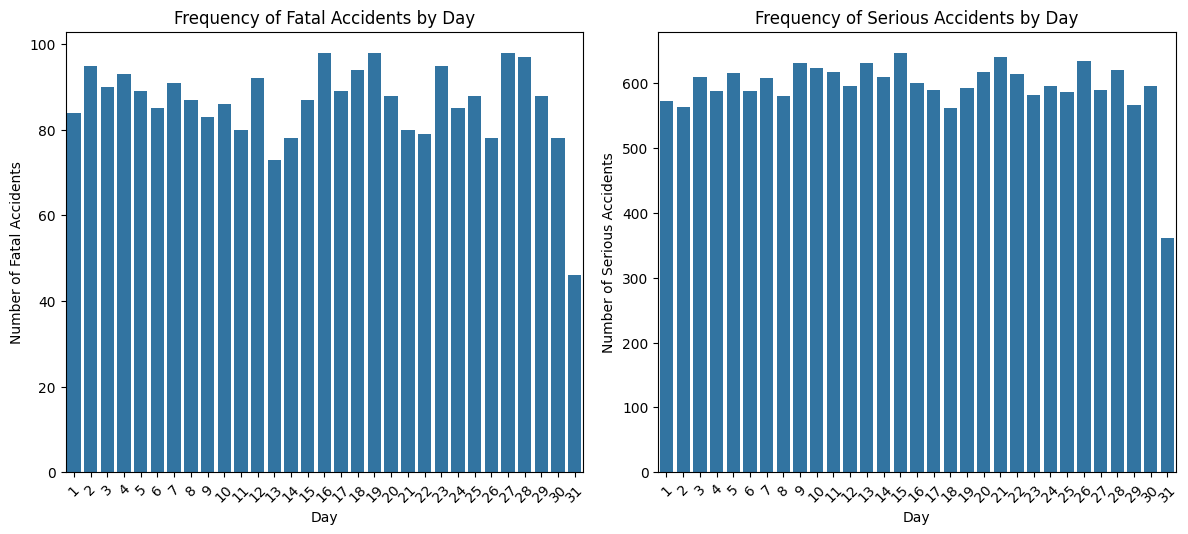

In [9]:
mortal_accident = df[(df["Severity of Accident"] == 'Accident mortal')]
greu_accident = df[(df["Severity of Accident"] == 'Accident greu')]
time_of_day_order = ['Matí', 'Tarda', 'Nit']  

type_of_road_order = ['Via urbana( inclou carrer i carrer residencial)',
       'Carretera convencional', 'Altres', 'Autopista', 'Autovia',
       'Camí rural/pista forestal']

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Time of Day Grouping', data=mortal_accident, order=time_of_day_order)
plt.title('Frequency of Fatal Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Fatal Accidents')

plt.subplot(2, 2, 2)
sns.countplot(x='Time of Day Grouping', data=greu_accident, order=time_of_day_order)
plt.title('Frequency of Serious Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Serious Accidents')

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 3)
sns.countplot(x='Type of Road', data=mortal_accident, order=type_of_road_order)
plt.title('Frequency of Fatal Accidents by Type of Road')
plt.xlabel('Type of Road')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x='Type of Road', data=greu_accident, order=type_of_road_order)
plt.title('Frequency of Serious Accidents by Type of Road')
plt.xlabel('Type of Road')
plt.ylabel('Number of Serious Accidents')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 3)
sns.countplot(x='Road Speed Limit', data=mortal_accident)
plt.title('Frequency of Fatal Accidents by Road Speed Limit')
plt.xlabel('Road Speed Limit')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x='Road Speed Limit', data=greu_accident)
plt.title('Frequency of Serious Accidents by Road Speed Limit')
plt.xlabel('Road Speed Limit')
plt.ylabel('Number of Serious Accidents')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 10))

order_area = ['Carretera', 'Zona urbana']
plt.subplot(2, 2, 3)
sns.countplot(x='Area', data=mortal_accident, order=order_area)
plt.title('Frequency of Fatal Accidents by Area')
plt.xlabel('Area')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x='Area', data=greu_accident, order=order_area)
plt.title('Frequency of Serious Accidents by Area')
plt.xlabel('Area')
plt.ylabel('Number of Serious Accidents')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 3)
sns.countplot(x="Month", data=mortal_accident)
plt.title('Frequency of Fatal Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x="Month", data=greu_accident)
plt.title('Frequency of Serious Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Serious Accidents')
plt.xticks(rotation=45)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 3)
sns.countplot(x="Day", data=mortal_accident)
plt.title('Frequency of Fatal Accidents by Day')
plt.xlabel('Day')
plt.ylabel('Number of Fatal Accidents')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x="Day", data=greu_accident)
plt.title('Frequency of Serious Accidents by Day')
plt.xlabel('Day')
plt.ylabel('Number of Serious Accidents')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\hugoz\AppData\Local\Temp\ipykernel_90820\1938754983.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accidents', y='Municipality Name', data=top_municipalities, palette='viridis')


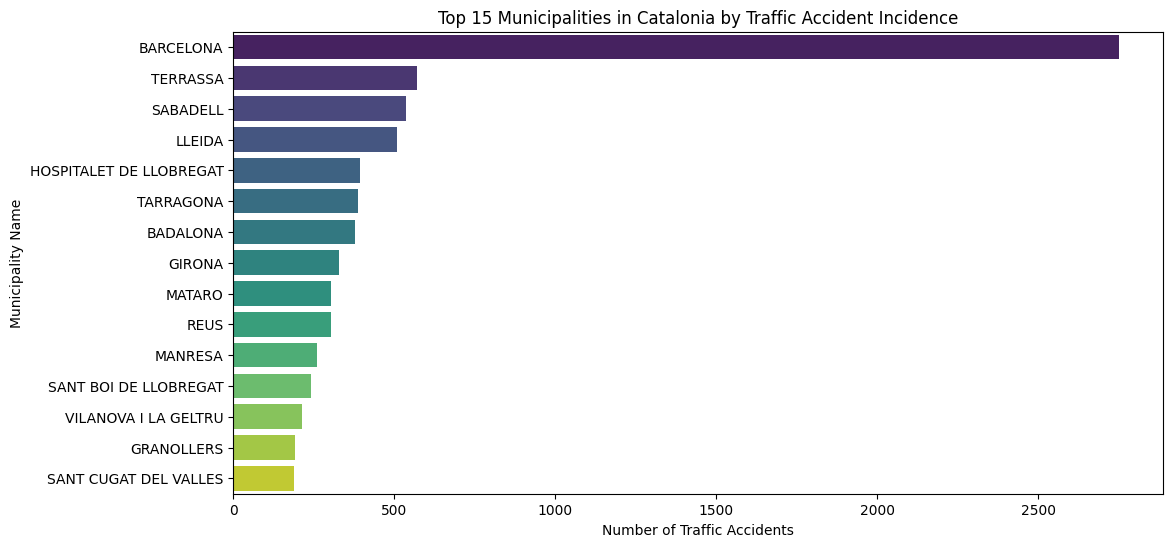

In [10]:
municipality_accidents = df.groupby('Municipality Name').size().reset_index(name='Accidents')

# Now let's sort the data to find the top municipalities with the most accidents
top_municipalities = municipality_accidents.sort_values('Accidents', ascending=False).head(15)

# We can plot this as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Accidents', y='Municipality Name', data=top_municipalities, palette='viridis')
plt.title('Top 15 Municipalities in Catalonia by Traffic Accident Incidence')
plt.xlabel('Number of Traffic Accidents')
plt.ylabel('Municipality Name')
plt.show()

In [11]:
density_data = pd.DataFrame.from_dict({
    'Municipality Name': [
        'BARCELONA',
        'TERRASSA', 
        'SABADELL', 
        'LLEIDA', 
        'HOSPITALET DE LLOBREGAT', 
        'TARRAGONA', 
        'BADALONA', 
        'GIRONA', 
        'MATARO',
        'REUS',
        'MANRESA',
        'SANT BOI DE LLOBREGAT',
        'VILANOVA I LA GELTRU',
        'GRANOLLERS',
        'SANT CUGAT DEL VALLES'
    ],
    'Population Density': [
        16339,
        3210,
        5767,
        673,
        22307,
        2389,
        10590,
        2659,
        5752,
        2054,
        1886,
        1729,
        2023,
        4233,
        2023
    ]
})

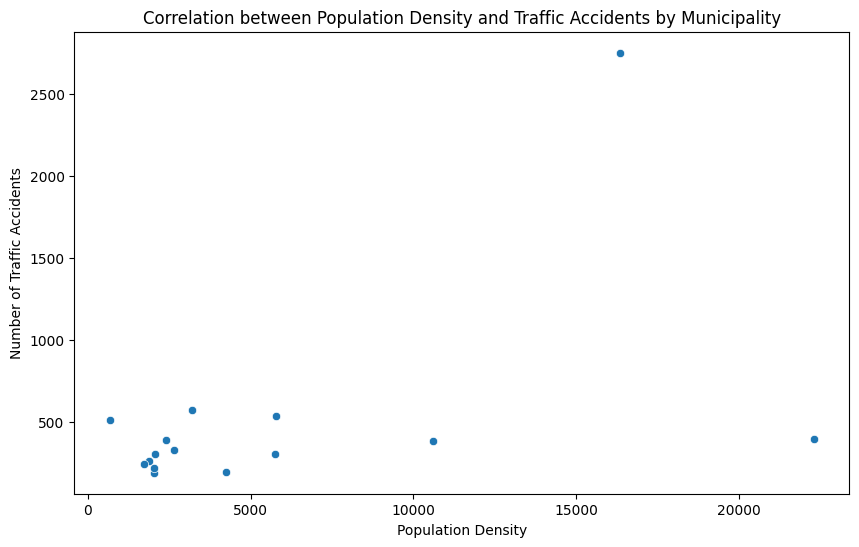

In [12]:
merged_data = pd.merge(municipality_accidents, density_data, on='Municipality Name')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population Density', y='Accidents', data=merged_data)
plt.title('Correlation between Population Density and Traffic Accidents by Municipality')
plt.xlabel('Population Density')
plt.ylabel('Number of Traffic Accidents')
plt.show()

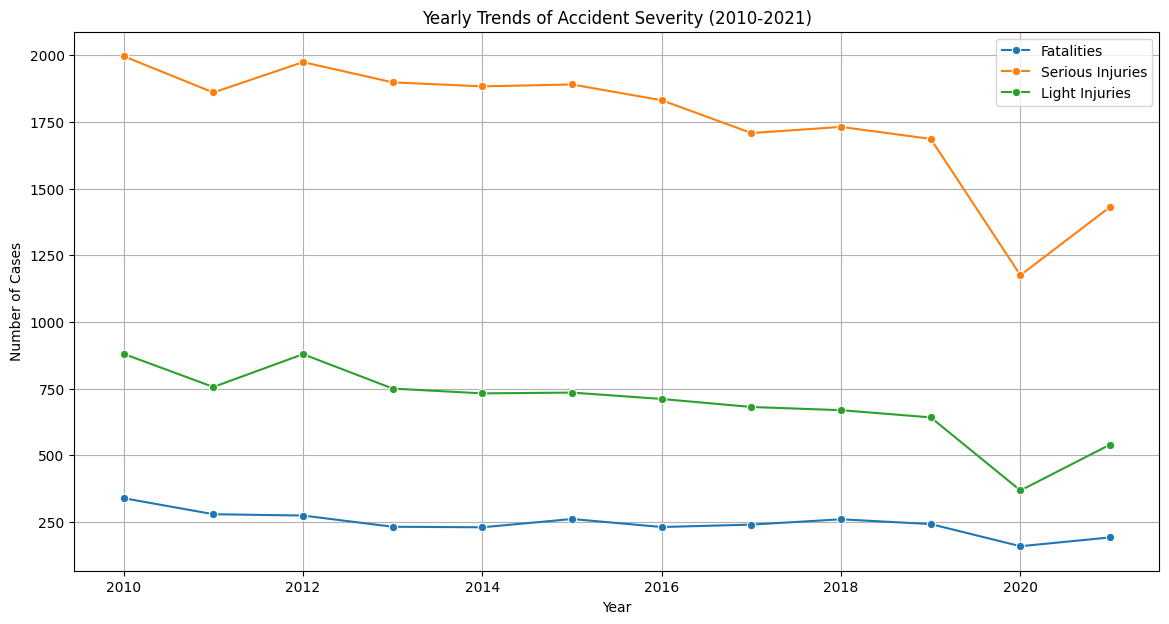

In [13]:
yearly_data = df.groupby('Year')[['Fatalties', 'Serious Injuries', 'Light Injuries']].sum().reset_index()

# Plotting the trends of accident severity over the years
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_data, x='Year', y='Fatalties', marker='o', label='Fatalities')
sns.lineplot(data=yearly_data, x='Year', y='Serious Injuries', marker='o', label='Serious Injuries')
sns.lineplot(data=yearly_data, x='Year', y='Light Injuries', marker='o', label='Light Injuries')
plt.title('Yearly Trends of Accident Severity (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


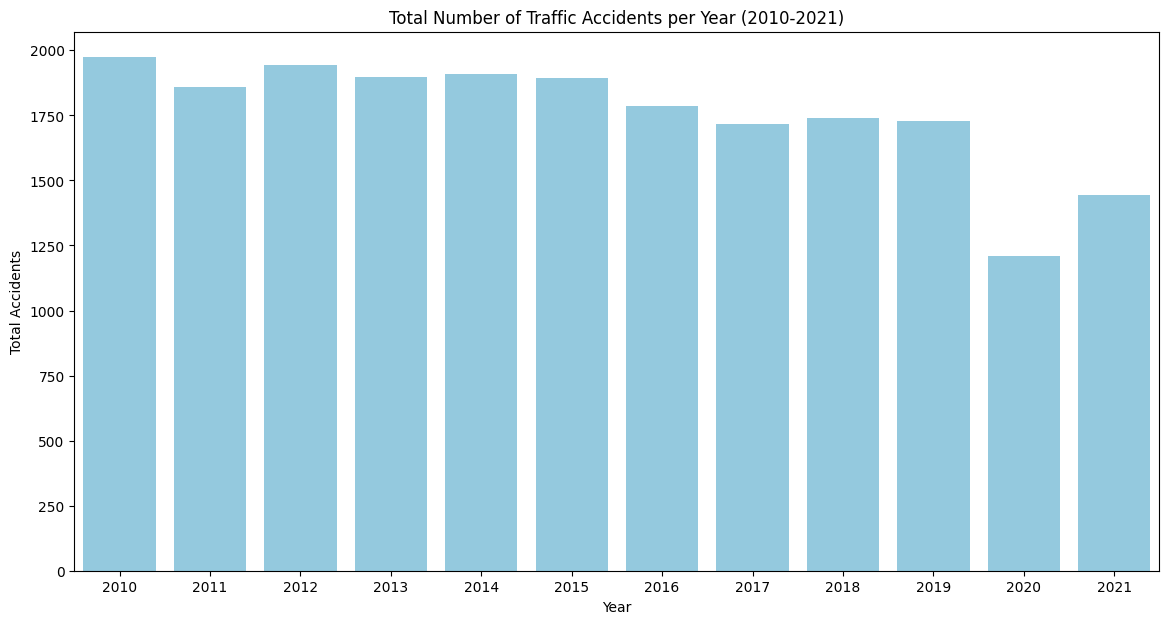

In [14]:
# Calculate the total number of accidents per year
accidents_per_year = df.groupby('Year').size().reset_index(name='Total Accidents')

# Create a bar plot for the total number of accidents
plt.figure(figsize=(14, 7))
sns.barplot(data=accidents_per_year, x='Year', y='Total Accidents', color='skyblue')
plt.title('Total Number of Traffic Accidents per Year (2010-2021)')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.show()


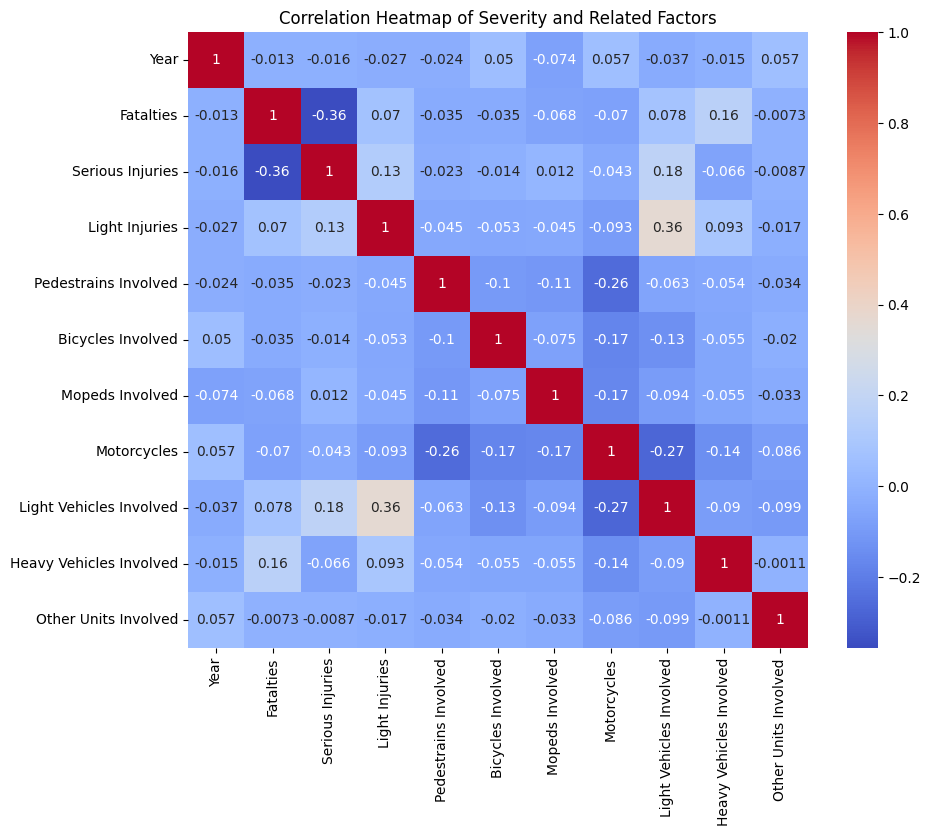

In [15]:
# Select severity and related factors
severity_factors = df[['Year', 'Fatalties', 'Serious Injuries', 'Light Injuries', 'Pedestrains Involved',
                       'Bicycles Involved', 'Mopeds Involved', 'Motorcycles', 'Light Vehicles Involved',
                       'Heavy Vehicles Involved', 'Other Units Involved']]

# Calculate the correlation matrix
corr_matrix = severity_factors.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Severity and Related Factors')
plt.show()


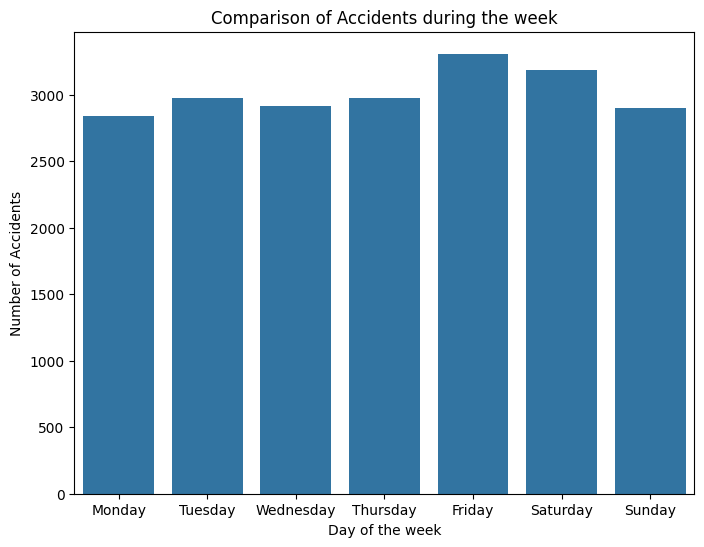

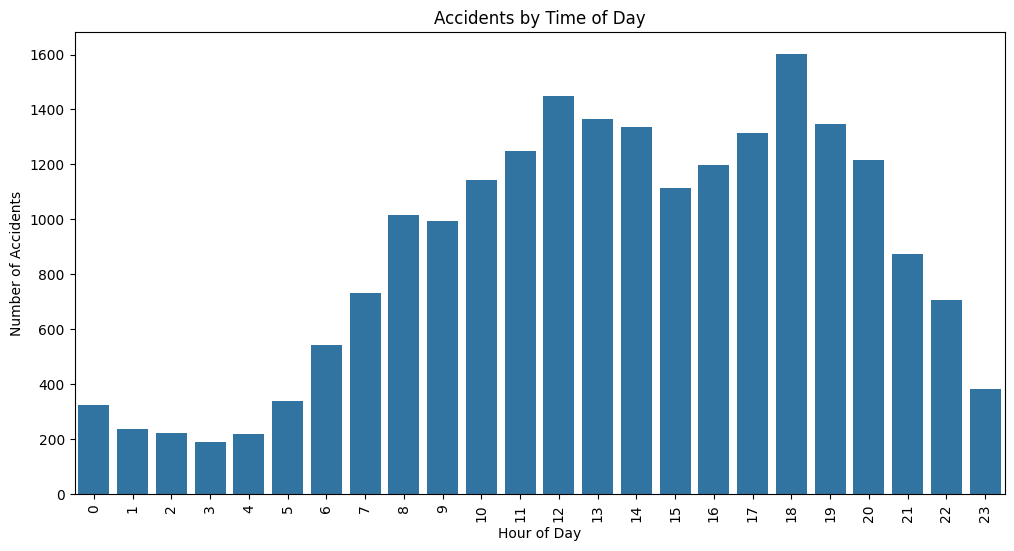

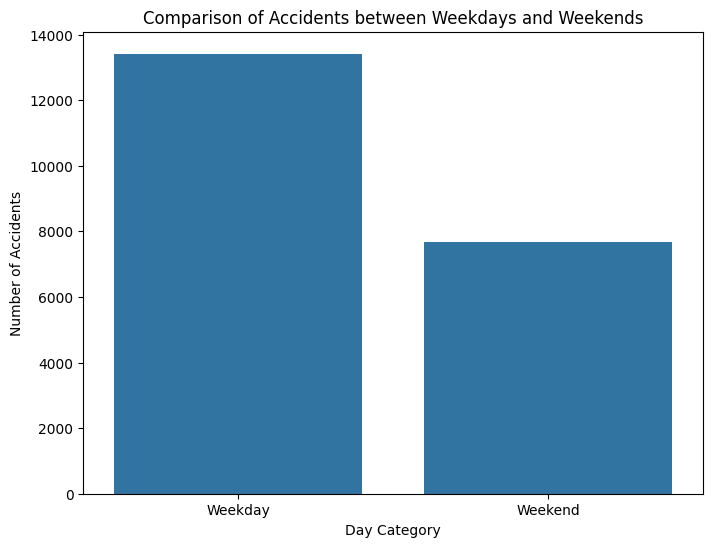

In [16]:
df['Day Category'] = df['Day of the Week Grouping'].apply(lambda x: 'Weekend' if x == 'CapDeSetmana' else 'Weekday')

# For comparison between weekdays and weekends
plt.figure(figsize=(8, 6))
sns.countplot(x='Day Type', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Comparison of Accidents during the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of Accidents')
plt.show()


df['Hour of Day Grouped'] = np.round(df['Hour of Day']).astype(int)
# Ensure that the hours are within the 0-23 range
df['Hour of Day Grouped'] = df['Hour of Day Grouped'] % 24
# For accidents by time of day
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour of Day Grouped', data=df, order=sorted(df['Hour of Day Grouped'].unique()))
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

# For comparison between weekdays and weekends
plt.figure(figsize=(8, 6))
sns.countplot(x='Day Category', data=df)
plt.title('Comparison of Accidents between Weekdays and Weekends')
plt.xlabel('Day Category')
plt.ylabel('Number of Accidents')
plt.show()

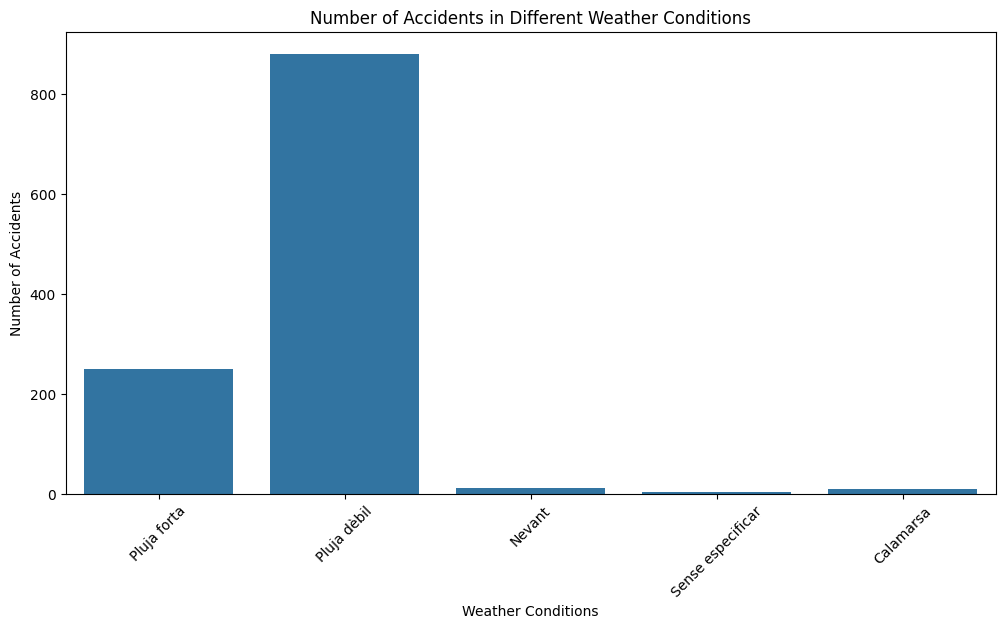

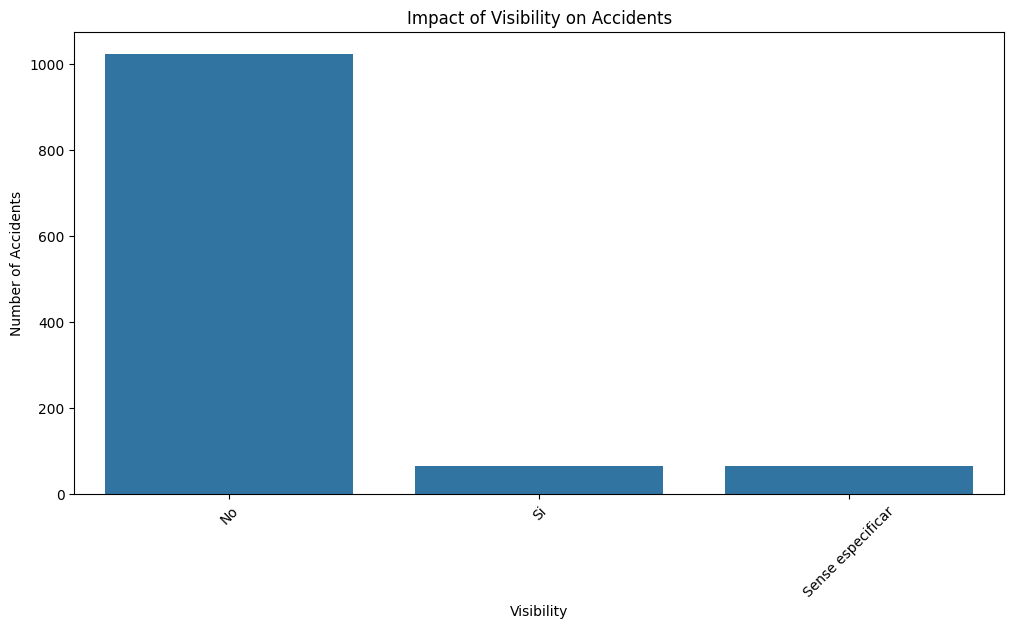

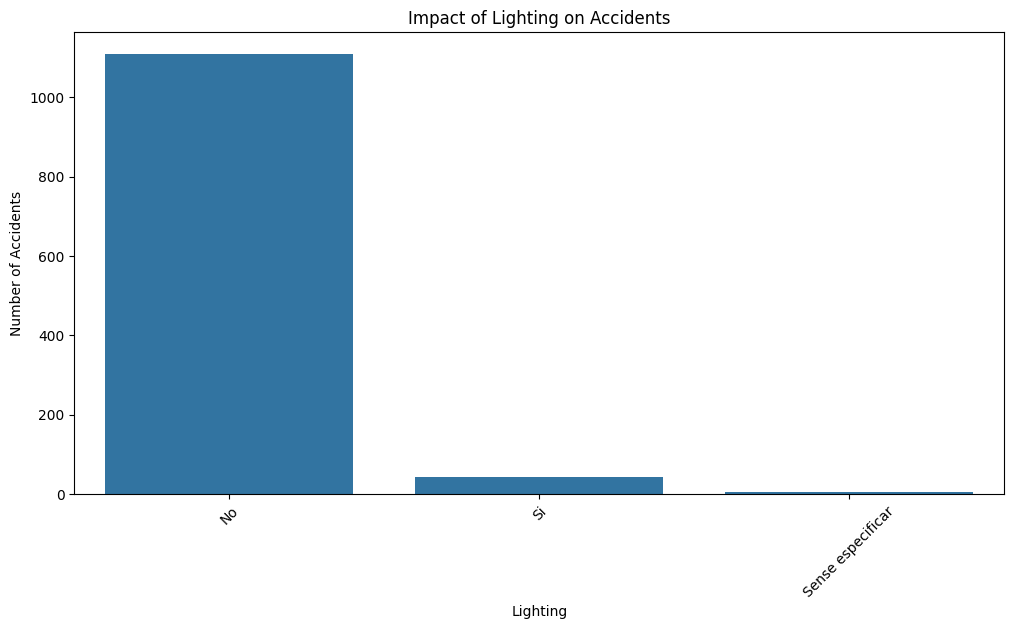

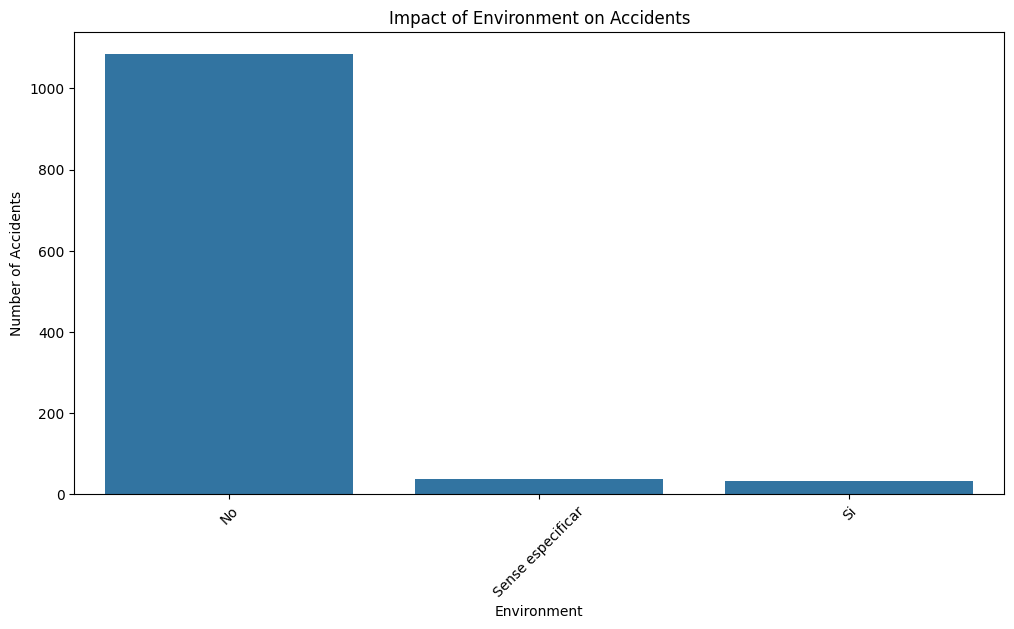

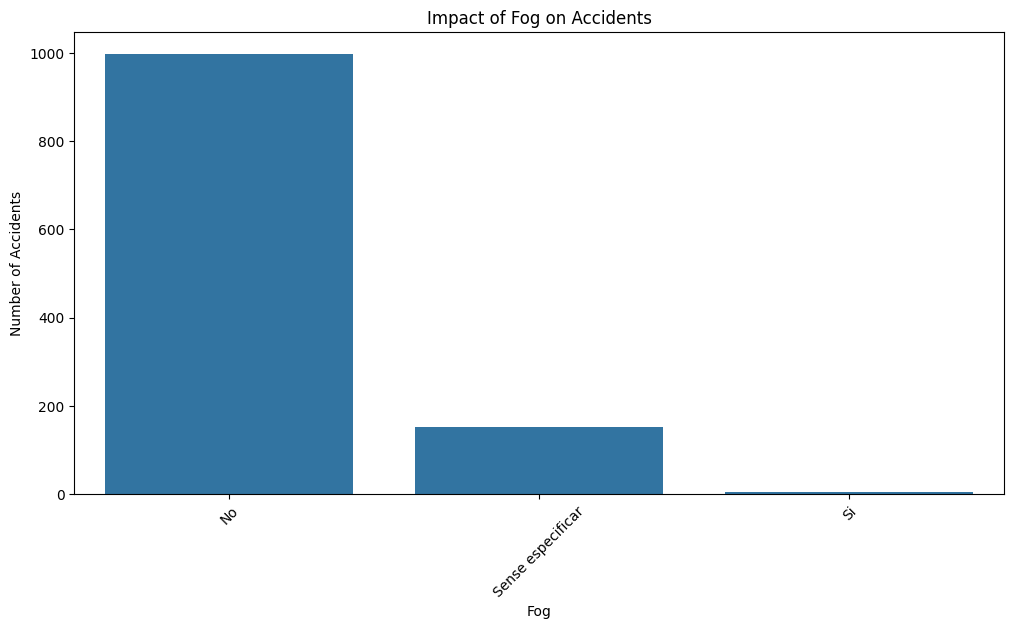

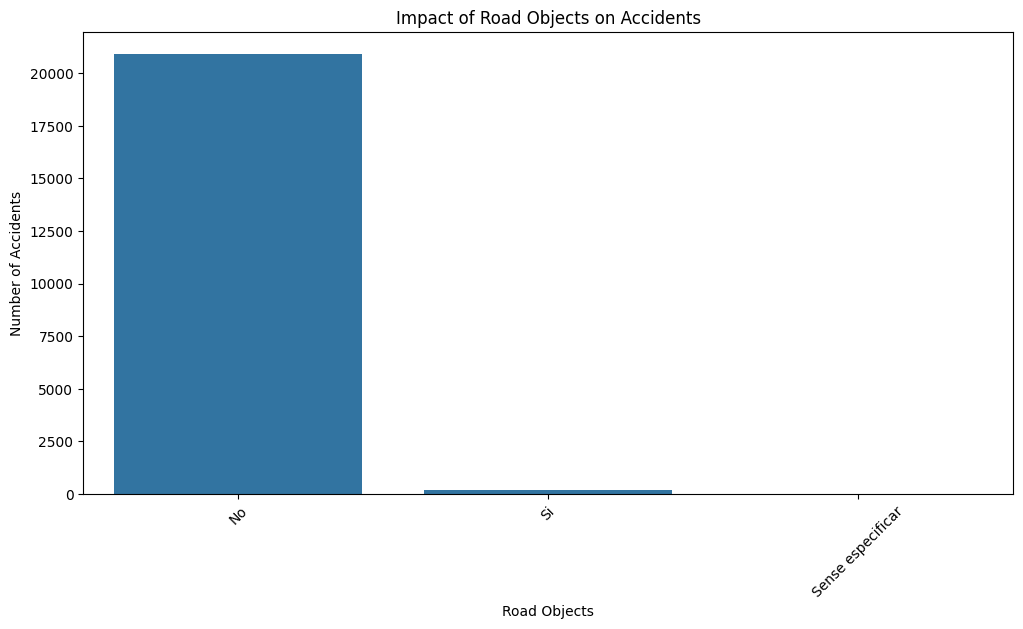

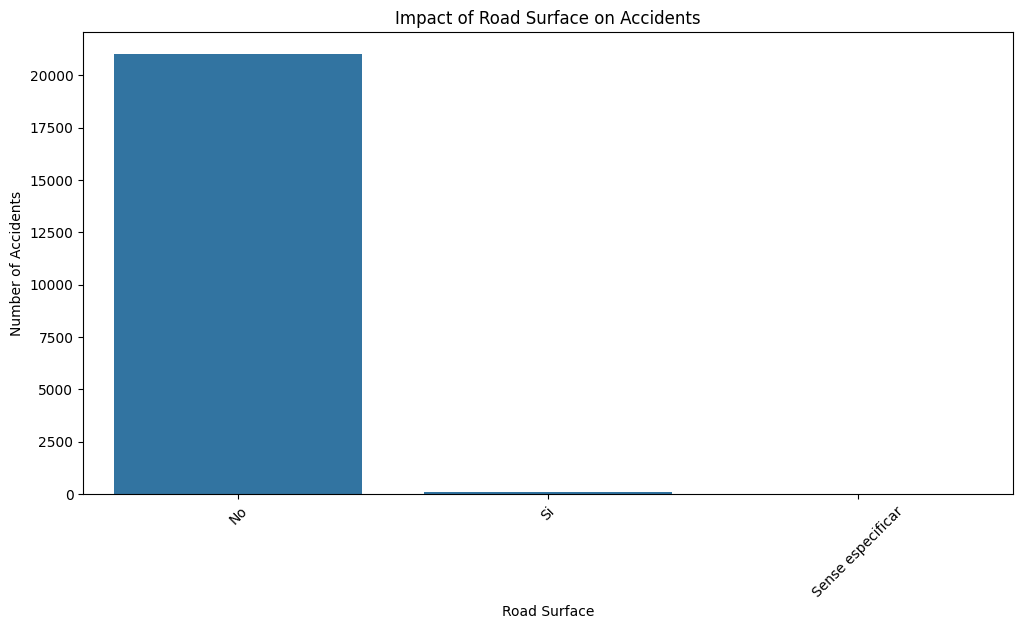

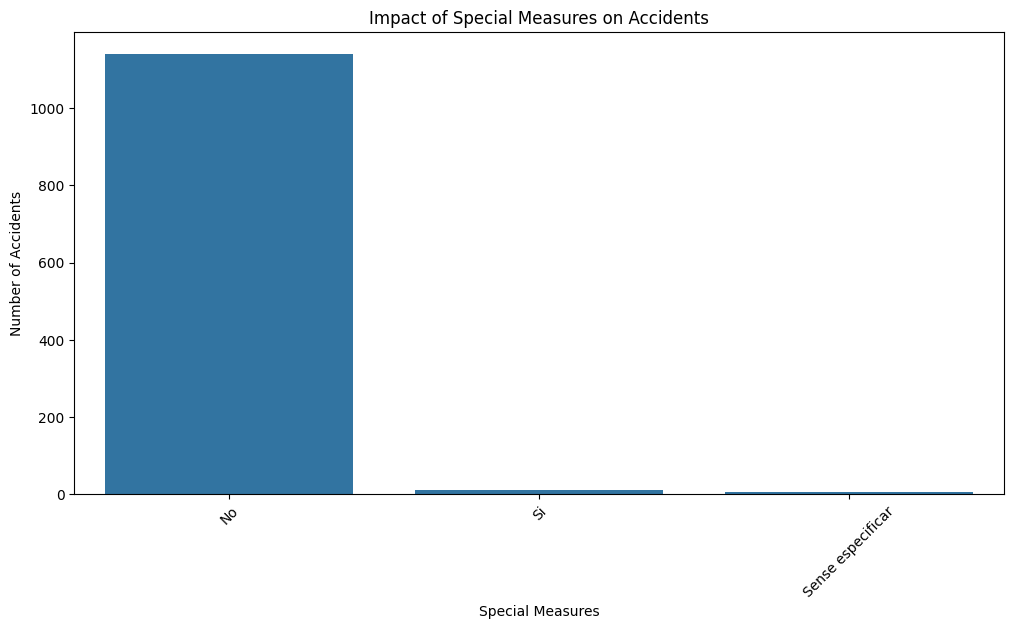

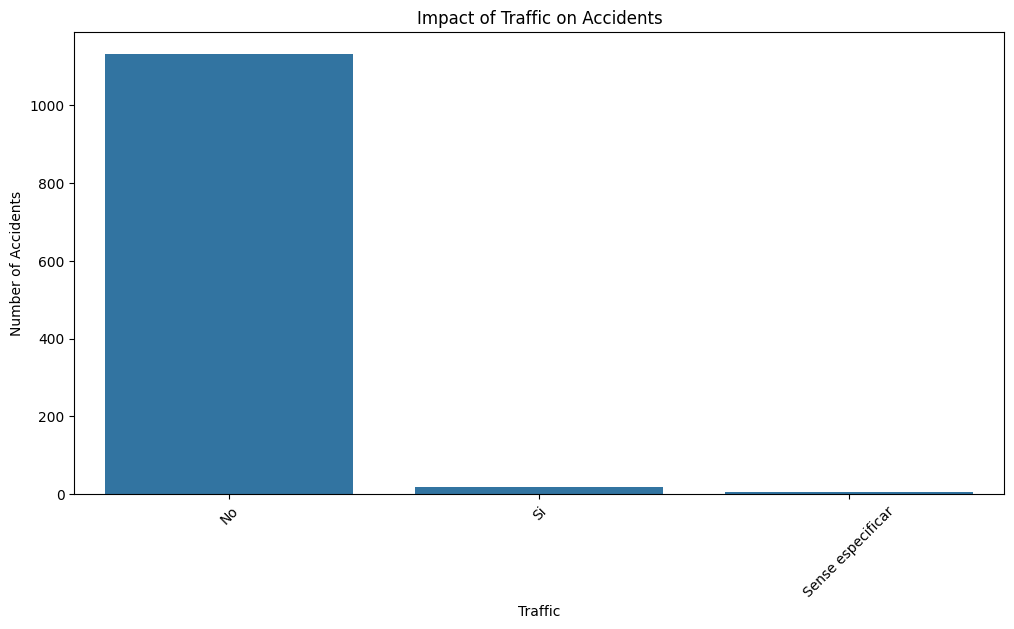

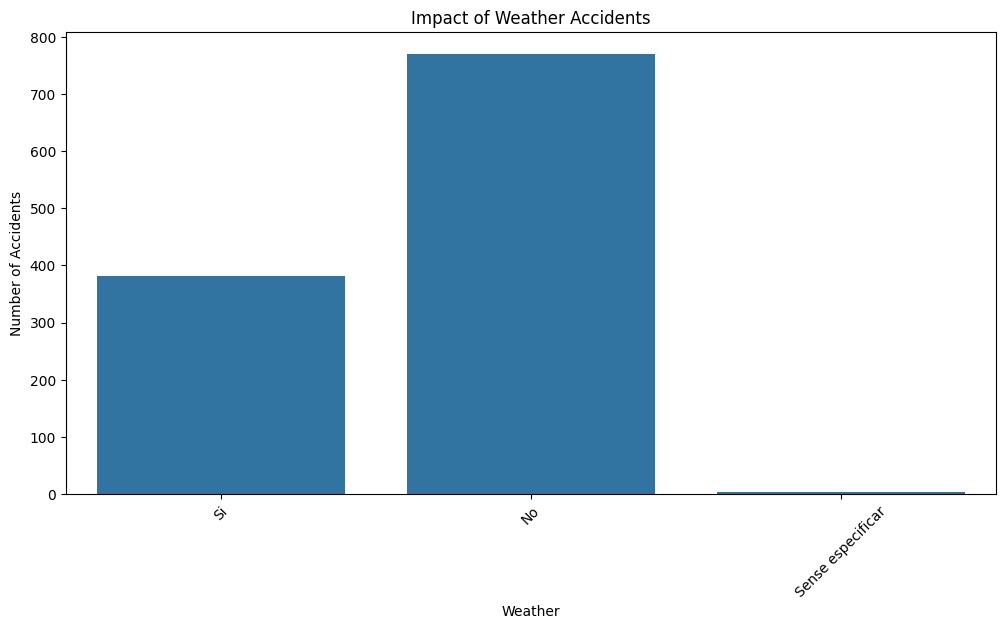

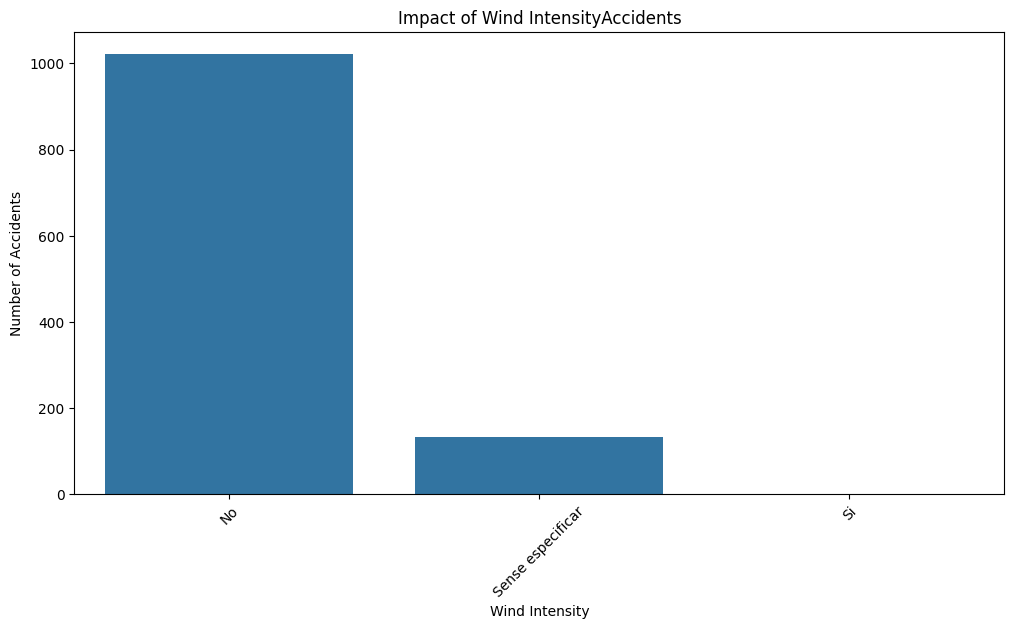

In [17]:
# Now let's visualize the number of accidents in different weather conditions
df_weather_conditions = df[df['Weather Conditions'] != 'Bon temps']
plt.figure(figsize=(12, 6))
sns.countplot(data=df_weather_conditions, x='Weather Conditions')
plt.title('Number of Accidents in Different Weather Conditions')
plt.xticks(rotation=45)
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_weather_conditions, x='Influence of Visibility')
plt.title('Impact of Visibility on Accidents')
plt.xticks(rotation=45)
plt.xlabel('Visibility')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_weather_conditions, x='Influence of Lighting')
plt.title('Impact of Lighting on Accidents')
plt.xticks(rotation=45)
plt.xlabel('Lighting')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_weather_conditions, x='Influence of Environment')
plt.title('Impact of Environment on Accidents')
plt.xticks(rotation=45)
plt.xlabel('Environment')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_weather_conditions, x='Influence of Fog')
plt.title('Impact of Fog on Accidents')
plt.xticks(rotation=45)
plt.xlabel('Fog')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Influence of Road Objects')
plt.title('Impact of Road Objects on Accidents')
plt.xticks(rotation=45)
plt.xlabel('Road Objects')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Influence of Road Surface')
plt.title('Impact of Road Surface on Accidents')
plt.xticks(rotation=45)
plt.xlabel('Road Surface')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_weather_conditions, x='Influence of Special Measures')
plt.title('Impact of Special Measures on Accidents')
plt.xticks(rotation=45)
plt.xlabel('Special Measures')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_weather_conditions, x='Influence of Traffic')
plt.title('Impact of Traffic on Accidents')
plt.xticks(rotation=45)
plt.xlabel('Traffic')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_weather_conditions, x='Influence of Weather')
plt.title('Impact of Weather Accidents')
plt.xticks(rotation=45)
plt.xlabel('Weather')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_weather_conditions, x='Influence of Wind Intensity')
plt.title('Impact of Wind IntensityAccidents')
plt.xticks(rotation=45)
plt.xlabel('Wind Intensity')
plt.ylabel('Number of Accidents')
plt.show()

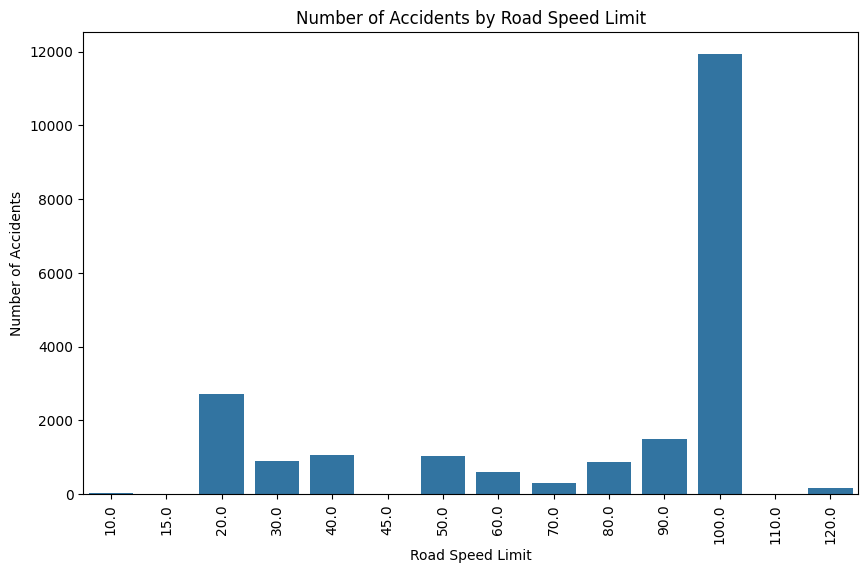

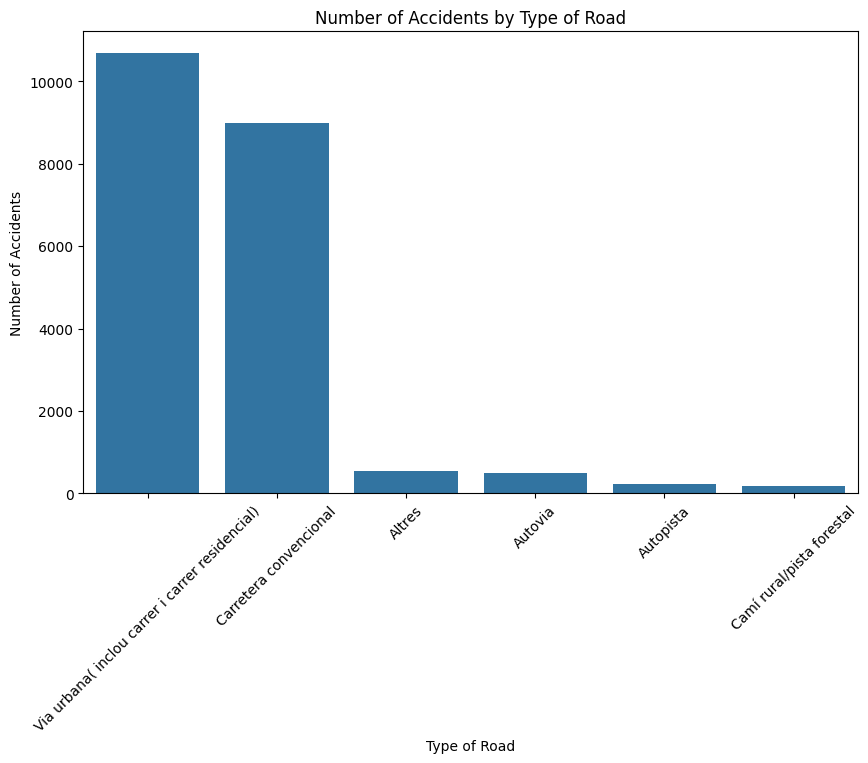

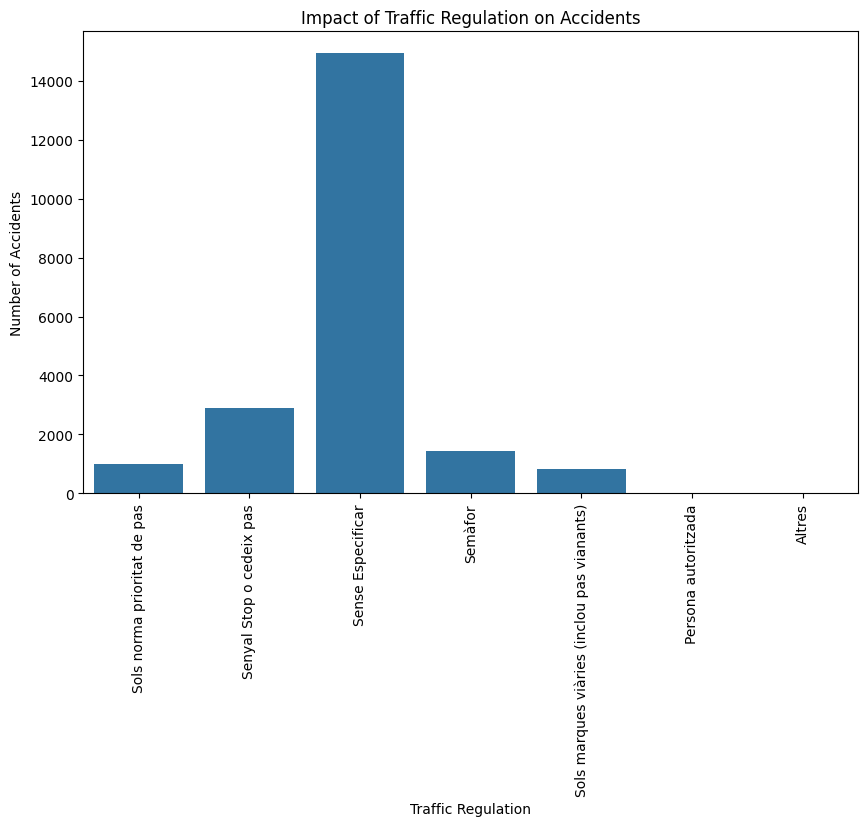

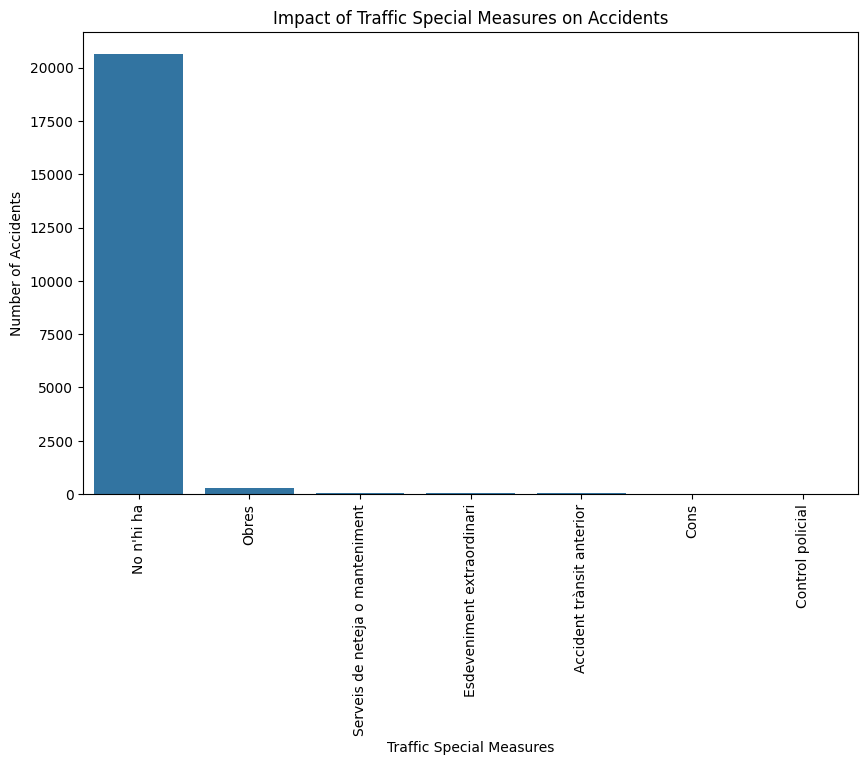

In [18]:
# Bar Chart for Speed Limits vs Accidents
plt.figure(figsize=(10, 6))
sns.countplot(x='Road Speed Limit', data=df, order = sorted(df['Road Speed Limit'].unique()))
plt.title('Number of Accidents by Road Speed Limit')
plt.xlabel('Road Speed Limit')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

# Bar Chart for Type of Road vs Accidents
plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Road', data=df, order = df['Type of Road'].value_counts().index)
plt.title('Number of Accidents by Type of Road')
plt.xlabel('Type of Road')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Traffic Regulation and Priority', data=df)  
plt.title('Impact of Traffic Regulation on Accidents')
plt.xlabel('Traffic Regulation')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Special Traffic Measures', data=df)  
plt.title('Impact of Traffic Special Measures on Accidents')
plt.xlabel('Traffic Special Measures')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()



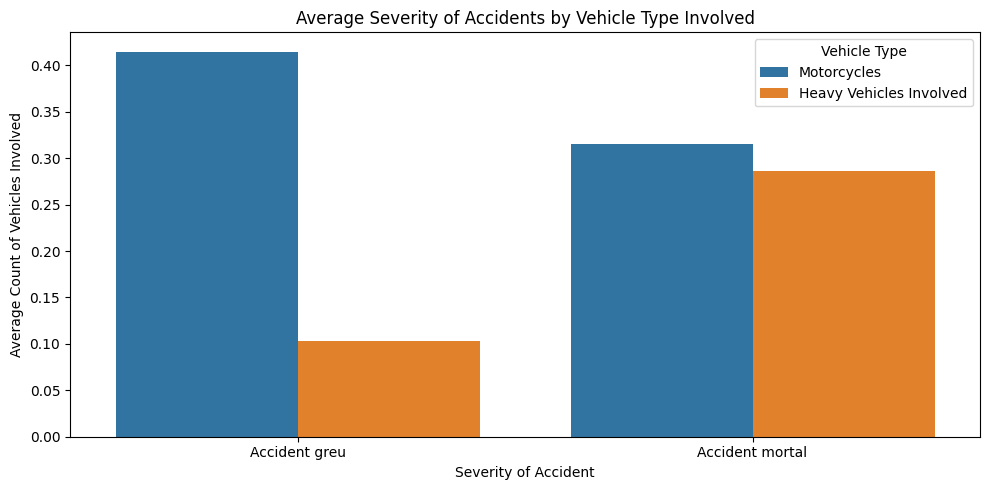

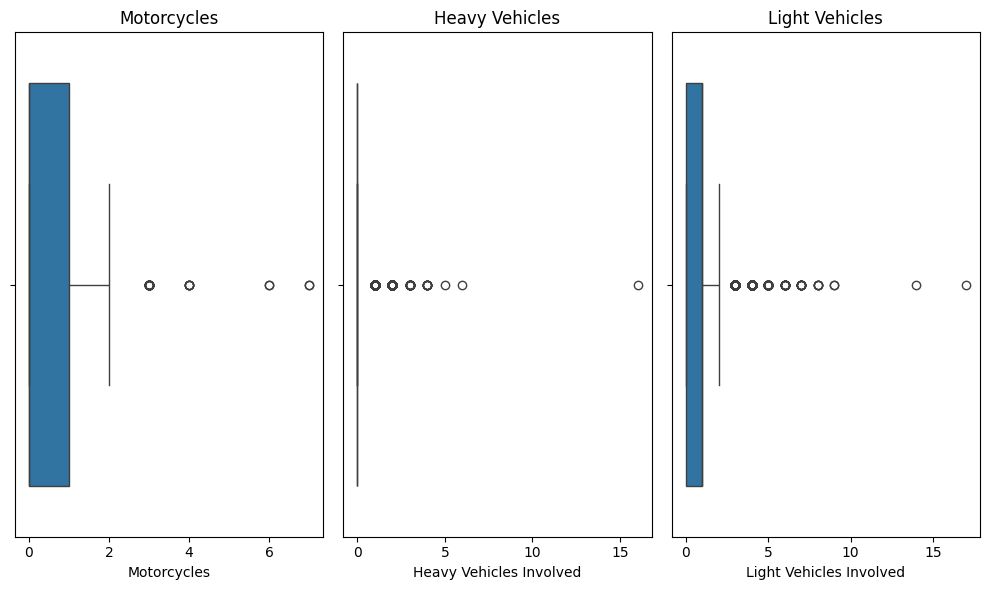

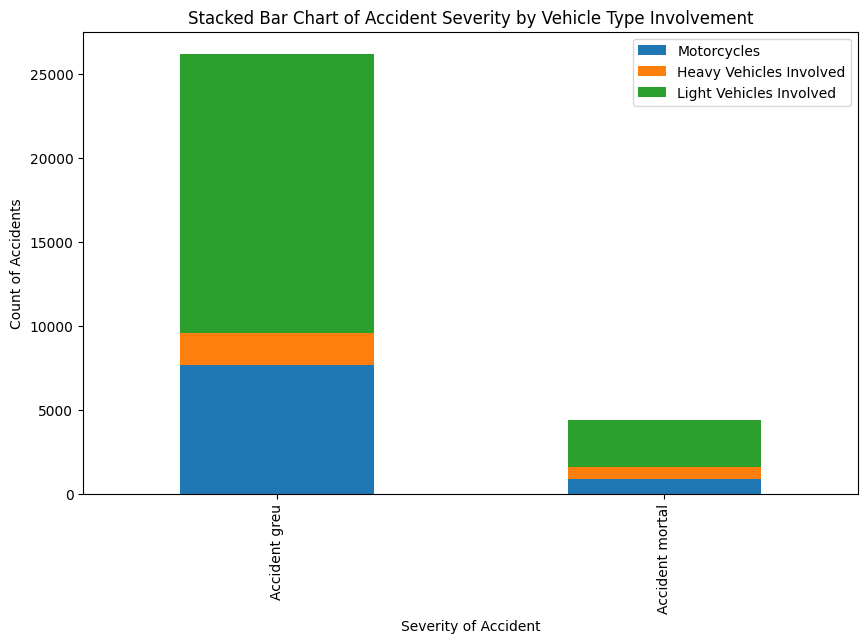

In [28]:
severity_by_vehicle_type = df.groupby('Severity of Accident').agg({
    'Motorcycles': 'mean',
    'Heavy Vehicles Involved': 'mean'
}).reset_index()

# Now, let's plot the aggregated data
plt.figure(figsize=(10, 5))

# We will use a bar plot for comparison
sns.barplot(x='Severity of Accident', y='value', hue='variable',
            data=pd.melt(severity_by_vehicle_type, ['Severity of Accident']))

plt.title('Average Severity of Accidents by Vehicle Type Involved')
plt.xlabel('Severity of Accident')
plt.ylabel('Average Count of Vehicles Involved')
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

# Motorcycles
plt.subplot(1, 3, 1)
sns.boxplot(x='Motorcycles', data=df)
plt.title('Motorcycles')

# Heavy Vehicles
plt.subplot(1, 3, 2)
sns.boxplot(x='Heavy Vehicles Involved', data=df)
plt.title('Heavy Vehicles')

# Light Vehicles
plt.subplot(1, 3, 3)
sns.boxplot(x='Light Vehicles Involved', data=df)
plt.title('Light Vehicles')

plt.tight_layout()
plt.show()

severity_counts = df.groupby('Severity of Accident').agg({
    'Motorcycles': 'sum',
    'Heavy Vehicles Involved': 'sum',
    'Light Vehicles Involved': 'sum'
})

severity_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Accident Severity by Vehicle Type Involvement')
plt.xlabel('Severity of Accident')
plt.ylabel('Count of Accidents')
plt.show()

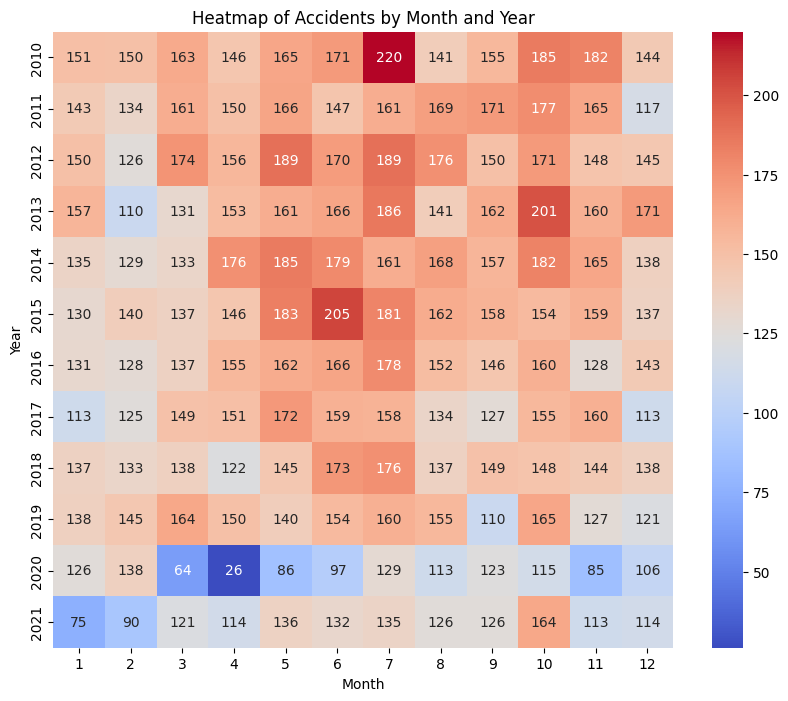

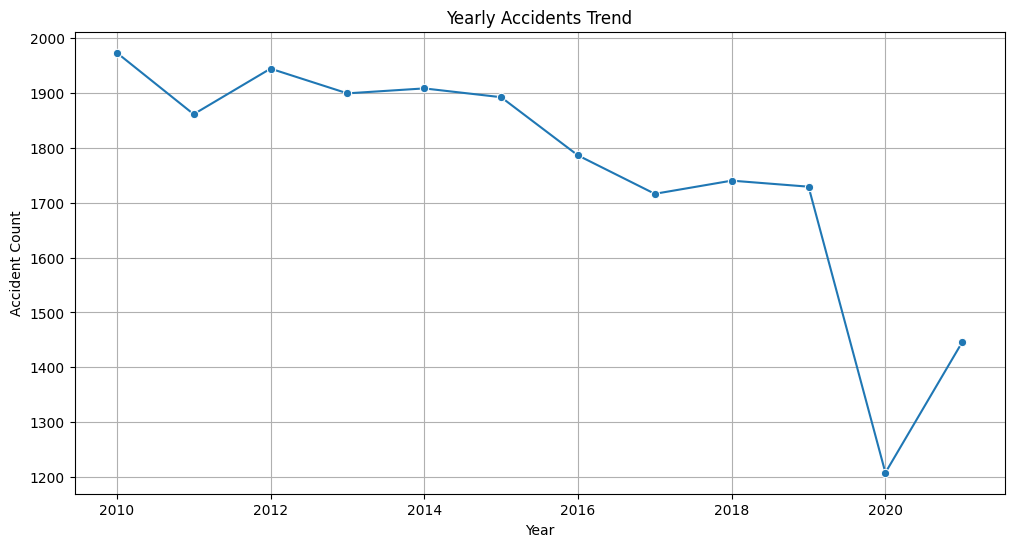

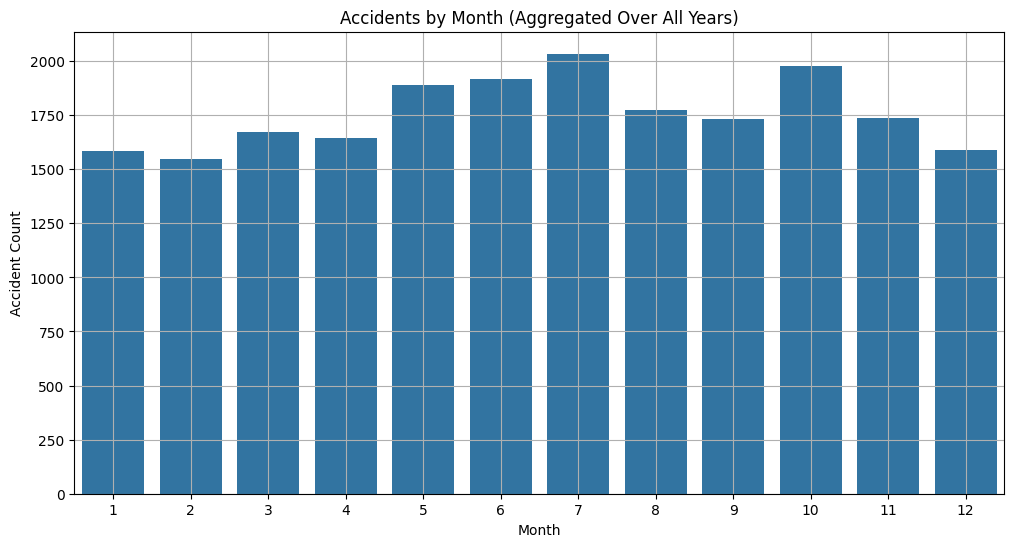

In [30]:
# Pivot data for heatmap
monthly_accidents = df.groupby(['Year', 'Month']).size().reset_index(name='Accident_Count')

# Pivot data for heatmap
accidents_pivot = monthly_accidents.pivot(index='Year', columns='Month', values='Accident_Count')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(accidents_pivot, annot=True, fmt="d", cmap='coolwarm')
plt.title('Heatmap of Accidents by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# Plot line graph for accidents over the years
yearly_accidents = df.groupby('Year').size().reset_index(name='Accident_Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_accidents, x='Year', y='Accident_Count', marker='o')
plt.title('Yearly Accidents Trend')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.grid(True)
plt.show()

# Plot bar graph for accidents by month (aggregated over all years)
monthly_totals = df.groupby('Month').size().reset_index(name='Accident_Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_totals, x='Month', y='Accident_Count')
plt.title('Accidents by Month (Aggregated Over All Years)')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.grid(True)
plt.show()